# Практична робота 1

## Першим кроком встановимо залежності

``` cmd
pip install autograd
pip install matplotlib
```

## Імпортуємо необхідні бібліотеки

In [2]:
import autograd.numpy as np
from autograd import elementwise_grad as egrad
import matplotlib.pyplot as plt

## Реалізуємо функцію
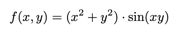

In [3]:
def math_function(x, y):
    return (np.square(x) + np.square(y)) * np.sin(x * y)

## Тепер знайдемо часткові похідні від x та y

In [4]:
df_dx = egrad(math_function, 0)
df_dy = egrad(math_function, 1)

x, y = float(1), float(2)
print("df/dx:", df_dx(x, y))
print("df/dy:", df_dy(x, y))

df/dx: -2.3428735118200605
df/dy: 1.5564555245670149


## Після виконання отримуємо результат:
df/dx в точці (1, 2) ≈ -2.34 <br>
df/dy в точці (1, 2) ≈ 1.56 <br>
Отже ∇f(x, y) в точці (1, 2) ≈ $\begin{bmatrix} -2.34 \\ 1.56 \end{bmatrix}$


## Тепер виконаємо обчислення вручну

$f(x, y) = (x^2 + y^2)\sin(xy)$

---

### 1. Знайдемо часткові похідні

Маємо функцію:
$$
f(x,y)=(x^2+y^2) \sin(xy)
$$

**Похідна за (x)** — правило добутку:
$$
\frac{\partial f}{\partial x}
=\frac{\partial(x^2+y^2)}{\partial x}\sin(xy)
+(x^2+y^2)\frac{\partial\sin(xy)}{\partial x}
$$
$$
\frac{\partial(x^2+y^2)}{\partial x}=2x\qquad
\frac{\partial\sin(xy)}{\partial x}=y\cos(xy)
$$
$$
\Rightarrow\quad
\frac{\partial f}{\partial x}
=2x\sin(xy)+y(x^2+y^2)\cos(xy)
$$

**Похідна за (y)** — правило добутку:
$$
\frac{\partial f}{\partial y}
=\frac{\partial(x^2+y^2)}{\partial y}\sin(xy)
+(x^2+y^2)\frac{\partial\sin(xy)}{\partial y}
$$
$$
\frac{\partial(x^2+y^2)}{\partial y}=2y\qquad
\frac{\partial\sin(xy)}{\partial y}=x\cos(xy)
$$
$$
\Rightarrow\quad
\frac{\partial f}{\partial y}
=2y\sin(xy)+x(x^2+y^2)\cos(xy)
$$


---

### 2. Підставимо \(x = 1\), \(y = 2\)

$$
\sin(1 \cdot 2) = \sin(2) \approx 0.9093, \quad
\cos(1 \cdot 2) = \cos(2) \approx -0.4161
$$

---

**Перша компонента:**

$$
\frac{\partial f}{\partial x}(1,2)
= 2(1)\sin(2) + 2(1^2 + 2^2)\cos(2)
= 2(0.9093) + 2(5)(-0.4161)
= 1.8186 - 4.161 = -2.3424 ≈ -2.34
$$

**Друга компонента:**

$$
\frac{\partial f}{\partial y}(1,2)
= 2(2)\sin(2) + 1(1^2 + 2^2)\cos(2)
= 4(0.9093) + 5(-0.4161)
= 3.6372 - 2.0805 = 1.5567 ≈ 1.56
$$

---

### Отже ∇f(x, y) в точці (1, 2):

$$
\begin{bmatrix}
-2.34 \\
1.56
\end{bmatrix}
$$


## Порівняння результатів
Автоматичне диференціювання:
$$
∇f(x, y) = \begin{bmatrix} -2.34 \\ 1.56 \end{bmatrix}
$$
Cимвольне диференціювання:
$$
∇f(x, y) = \begin{bmatrix} -2.34 \\ 1.56 \end{bmatrix}
$$
Як бачимо - результати зійшлись !

## Тепер, візуалізуємо функцію та її похідні
Оскільки наша функція залежна від двох змінних - наша візулізація має бути тримірною.
Але, перед цим - підготуємо значення для візуалізації

In [7]:
x = np.linspace(-7, 7, 2000)
y = np.linspace(-7, 7, 2000)

X, Y = np.meshgrid(x, y)
Z = math_function(X, Y)
Zx = df_dx(X, Y)
Zy = df_dy(X, Y)

## Залишилось побудувати необхідні плоти

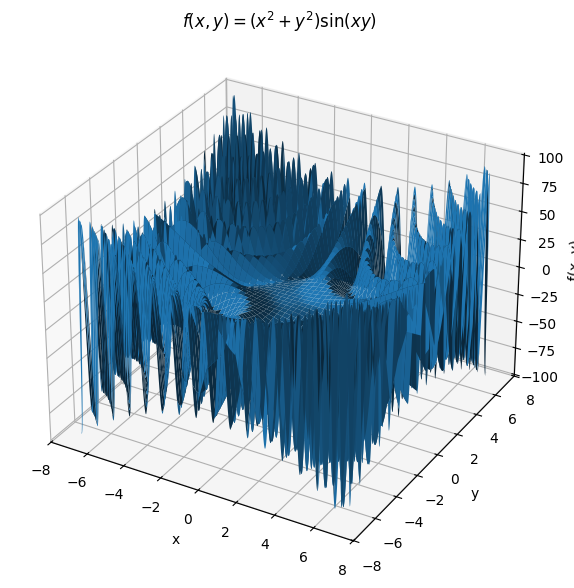

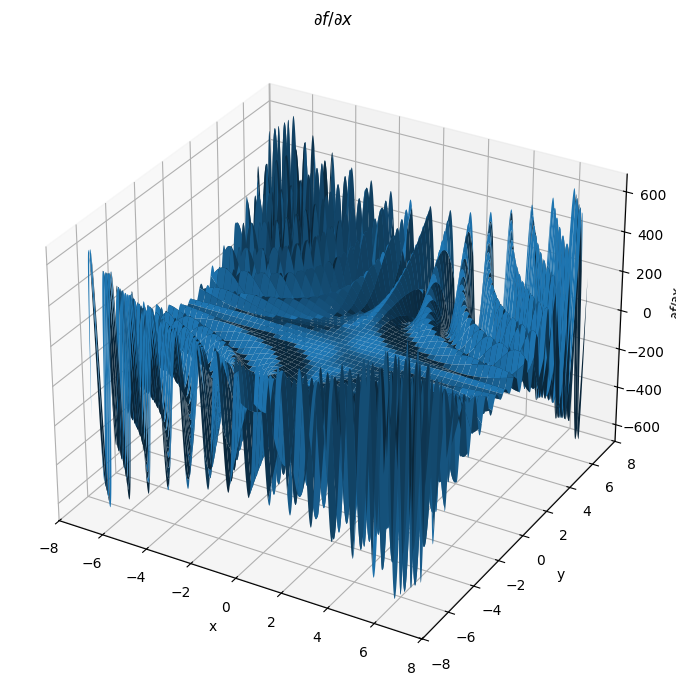

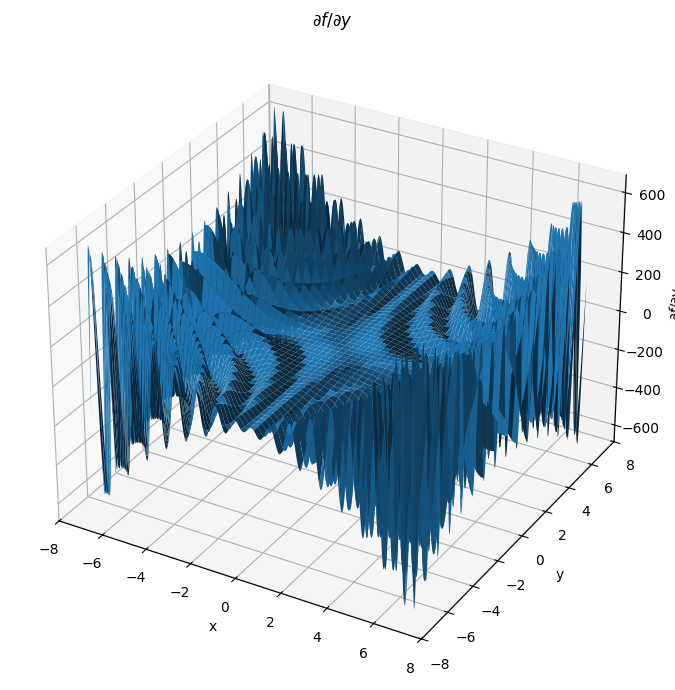

In [11]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(X, Y, Z)
ax.set_title(r"$f(x,y)=(x^2+y^2)\sin(xy)$")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')

plt.show()

for Zv, title in ((Zx, r"$\partial f/\partial x$"), (Zy, r"$\partial f/\partial y$")):
    fig = plt.figure(figsize=(7, 7))
    ax = fig.add_subplot(111, projection="3d")
    ax.plot_surface(X, Y, Zv)
    ax.set_title(title)
    ax.set_xlabel("x"); ax.set_ylabel("y"); ax.set_zlabel(title)
    plt.tight_layout()
    plt.show()

## Аналіз графіків
Оскліьки наша функція містить періодичний множник і має тенденції квадратичного зростання - ми бачимо хвилеподібну структуру, в яких амплітуда хвиль збільшується за мірою збільшення x та y. <br>
В частковій похідній по х - у зростає кубічно, тому з ростом у амплітуда похідної за х значно збільшується <br>
В частковій похідній по у - протилежна ситуація, це добре видно на графіках.

### Висновок
Графіки відповідають початковій функції та її похідним

## Різниця мiж чисельним, символьним та автоматичним диференцiюванням
1. **Символьне диференціювання** - коли ми вручну виводимо формулу похідної, використовуючи правила похідних

2. **Чисельне диференціювання** - наближене обчислення за формулою різниці:
   $$
   f'(x) \approx \frac{f(x+h) - f(x-h)}{2h}
   $$
Він дуже чутливий до вибору h. Якщо h занадто велике - велика похибка апроксимації, якщо занадто мале - велика похибка округлення

3. **Автоматичне диференціювання** - програмний підхід, що розкладає обчислення функції на елементарні операції. Він дає  машинної точності результати, не потребуючи аналітичних формул. Використовують у більшості бібліотек (PyTorch, TensorFlow, autograd, і т.д)

### Приклад функції, де чисельне дає неточність, а автоматичне дає точний результат:

Розглягемо функцію:
$$
f(x) = \sin(1000x) + 10^{-10}x
$$

Похідна:
$$
f'(x) = 1000\cos(1000x) + 10^{-10}
$$

При дуже малих x, наприклад $x = 10^{-8}$, якщо обчислити чисельно при $h = 10^{-6}$ - результат буде сильно шуміти через втрату точності при відніманні близьких чисел.

Якщо ж використати автоматичне диференціювання - отримаємо точне значення, яке збігається з аналітичним
$$
1000\cos(1000x) + 10^{-10}
$$


## У чому рiзниця мiж автоматичним диференцiювання у прямому режимi та зворотному режимi

Обчислення градієнтів через правило ланцюга можна записати як добуток проміжних якобіанів
$$
\frac{\partial \mathbf{y}}{\partial \mathbf{x}}
=\frac{\partial r(\mathbf{b})}{\partial \mathbf{b}}
 \frac{\partial q(\mathbf{a})}{\partial \mathbf{a}}
 \frac{\partial p(\mathbf{x})}{\partial \mathbf{x}}
$$
При цьому різниця між forward-mode і reverse-mode у порядку множення матриць

### Коли застосовуємо який режим

* Якщо функція $f: \mathbb R^n \to \mathbb R^m$ і $m \gg n$ (багато виходів, мало входів) - forward-mode зазвичай кращий
* Якщо $m \ll n$ (наприклад, скаляр-вихід, багато входів) - reverse-mode більш ефективний

### Програмний приклад

**Forward-mode (мало входів і багато виходів):**

```python
import autograd.numpy as np
from autograd import jacobian

def f(v):
    x, y = v
    return np.array([x * np.sin(y), y * np.cos(x)])

J = jacobian(f)
print(J(np.array([1.0, 2.0])))
```

**Reverse-mode (багато входів і лише один вихід):**

```python
import autograd.numpy as np
from autograd import grad

def f(x, y):
    return (x**2 + y**2) * np.sin(x * y)

df_dx = grad(f, 0)
df_dy = grad(f, 1)

print("df/dx =", df_dx(1.0, 2.0))
print("df/dy =", df_dy(1.0, 2.0))
```